In [1]:
import networkx as nx

In [2]:
dataset='gowalla'

In [3]:
k=3

In [4]:
k_core=nx.read_adjlist(f'k_cores/{dataset}/{k}')

In [5]:
import glob

In [6]:
import math

In [7]:
import os

In [8]:
import os.path

In [9]:
detected_communities_filepath_list = glob.glob(f'detected_communities/{dataset}/{k}/*')

In [10]:
m_values = [
    int(string_value)
    for string_value in os.listdir(f'detected_communities/{dataset}/{k}')
]

In [11]:
m_values_to_detected_communities = {}

for m_value in sorted(m_values):
    detected_community = nx.read_adjlist(f'detected_communities/{dataset}/{k}/{m_value}')
    if len(detected_community.nodes):
        m_values_to_detected_communities[m_value] = detected_community

m_values_to_detected_communities[math.inf] = k_core

In [12]:
m_values_to_detected_communities

{4: <networkx.classes.graph.Graph at 0x7f5b45053290>,
 6: <networkx.classes.graph.Graph at 0x7f5b45053350>,
 8: <networkx.classes.graph.Graph at 0x7f5b6422e3d0>,
 10: <networkx.classes.graph.Graph at 0x7f5b45053450>,
 12: <networkx.classes.graph.Graph at 0x7f5b6baed110>,
 14: <networkx.classes.graph.Graph at 0x7f5b3fffb190>,
 16: <networkx.classes.graph.Graph at 0x7f5b3f545250>,
 18: <networkx.classes.graph.Graph at 0x7f5b3e9800d0>,
 20: <networkx.classes.graph.Graph at 0x7f5b3dce92d0>,
 22: <networkx.classes.graph.Graph at 0x7f5b3cee4e90>,
 24: <networkx.classes.graph.Graph at 0x7f5b37fcb1d0>,
 26: <networkx.classes.graph.Graph at 0x7f5b37079950>,
 28: <networkx.classes.graph.Graph at 0x7f5b35fe76d0>,
 inf: <networkx.classes.graph.Graph at 0x7f5b6422e690>}

In [13]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b1ba68790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b1ba15690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b1bb97390>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b196577d0>,
 'fliers': [],
 'means': []}

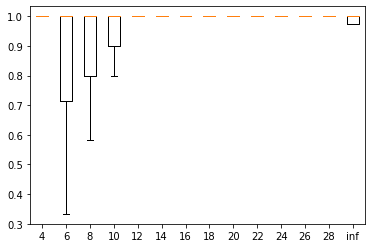

In [14]:
figure, axes=plt.subplots()

axes.boxplot(
    [
        [
            nx.density(
                graph.subgraph(connected_component)
            ) for connected_component in nx.connected_components(graph)
        ]
        for graph in m_values_to_detected_communities.values()
    ],
    labels=m_values_to_detected_communities.keys(),
    sym=''
)

In [15]:
figure.savefig(f'{dataset}-{k}-m_values_to_densities.pdf')